### Configuration et Chargement

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration "Senior" pour des graphiques de qualité publication
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
warnings.filterwarnings('ignore') # On ignore les warnings non critiques

# Chargement (Assurez-vous que le chemin est bon)
df = pd.read_csv('../data/raw/train.csv') # Remplacez par votre chemin
df_test = pd.read_csv('../data/raw/test.csv')

# Séparation des types de colonnes (CRUCIAL pour l'automatisation)
# Basé sur le dataset Kaggle standard
target = 'Heart Disease'

# Variables numériques continues
num_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']

# Variables catégorielles (ou binaires/ordinales)
cat_cols = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']

print(f"Dataset chargé : {df.shape[0]} lignes, {df.shape[1]} colonnes.")

Dataset chargé : 630000 lignes, 15 colonnes.


## Moteur de Génération de Figures

### Groupe 1 : Analyse de la Cible (1 Figure)
Equilibre

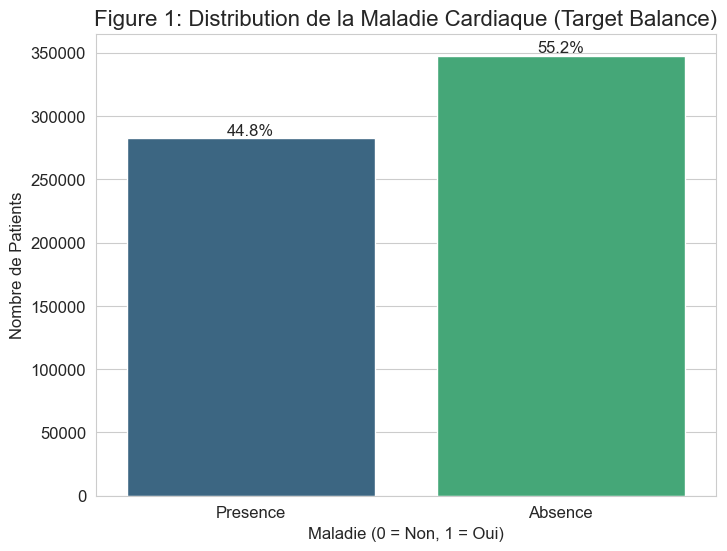

In [5]:
# Figure 1 : Distribution de la Cible
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x=target, palette='viridis')
plt.title('Figure 1: Distribution de la Maladie Cardiaque (Target Balance)', fontsize=16)
plt.xlabel('Maladie (0 = Non, 1 = Oui)')
plt.ylabel('Nombre de Patients')

# Ajout des pourcentages (Touche Pro)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

### Groupe 2 : Analyse des Variables Numériques (12 Figures)
distribution globale et son impact sur la maladie.

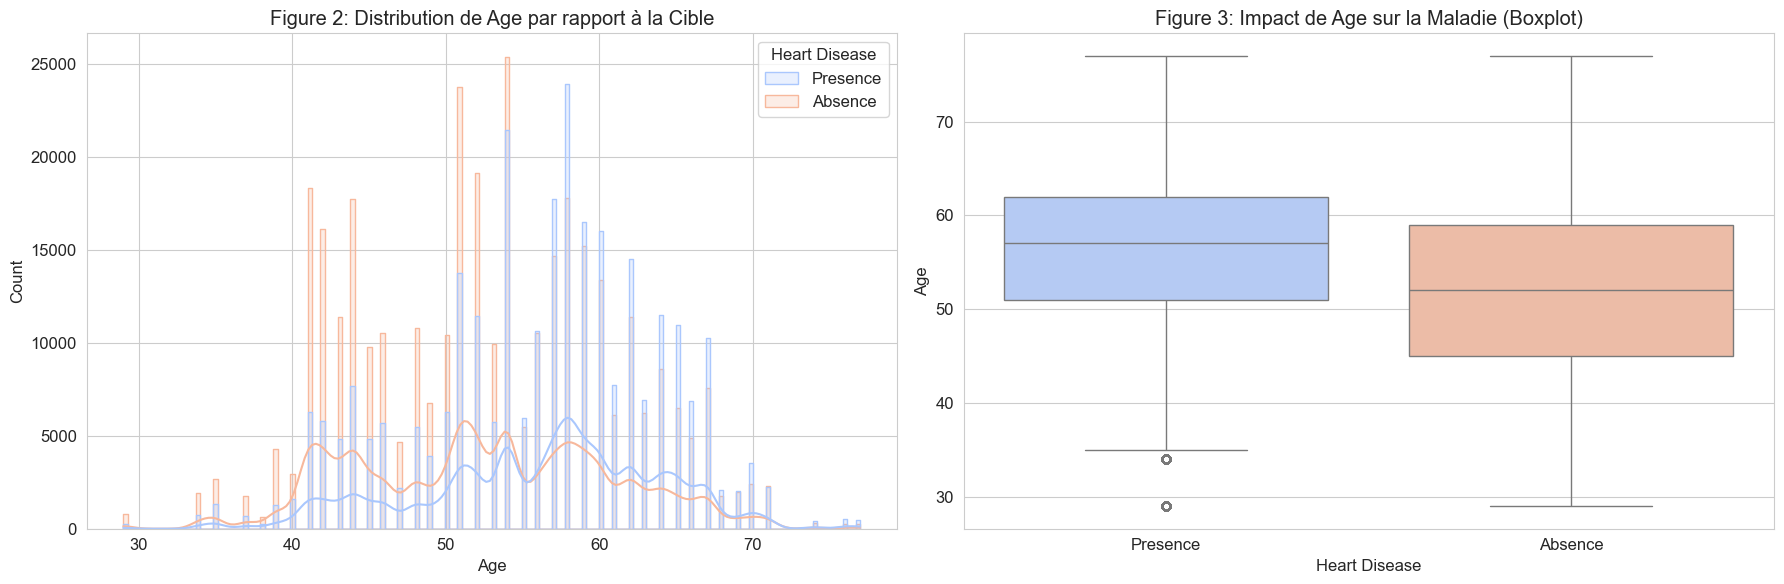

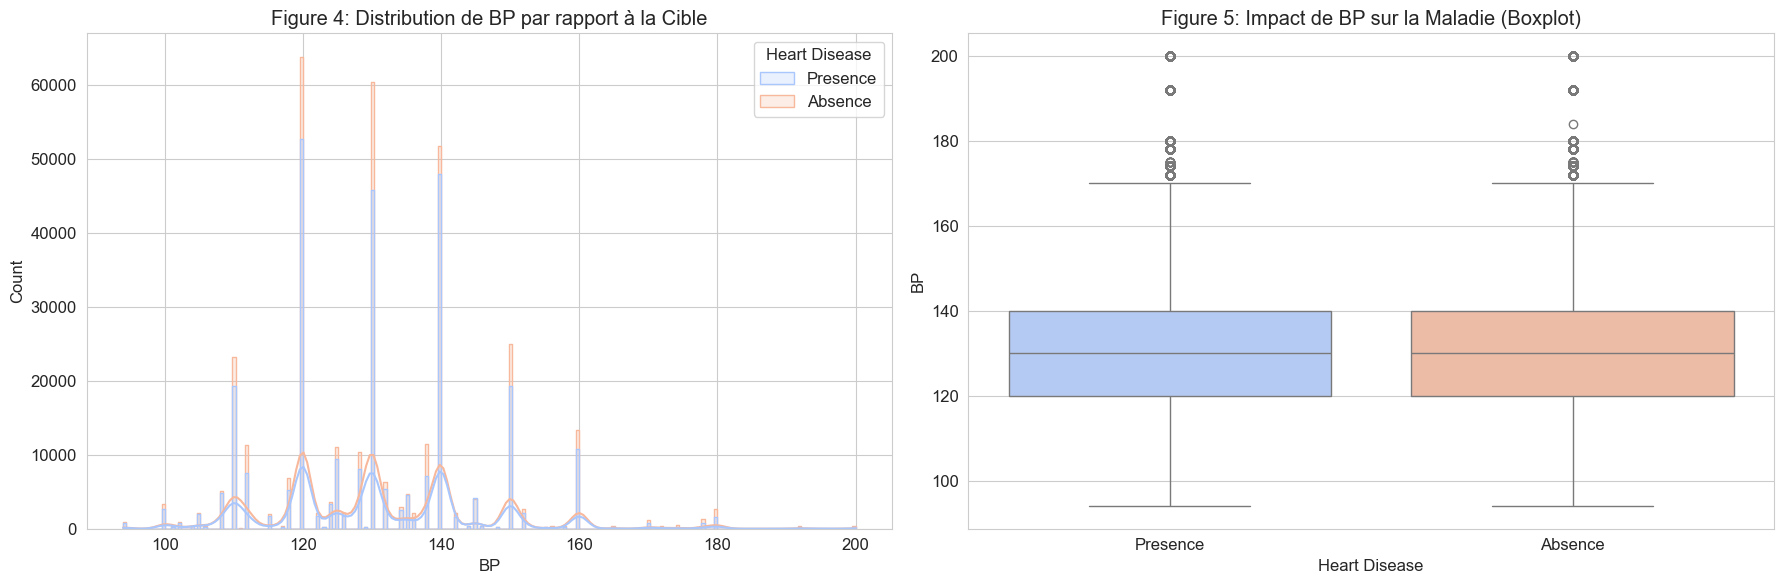

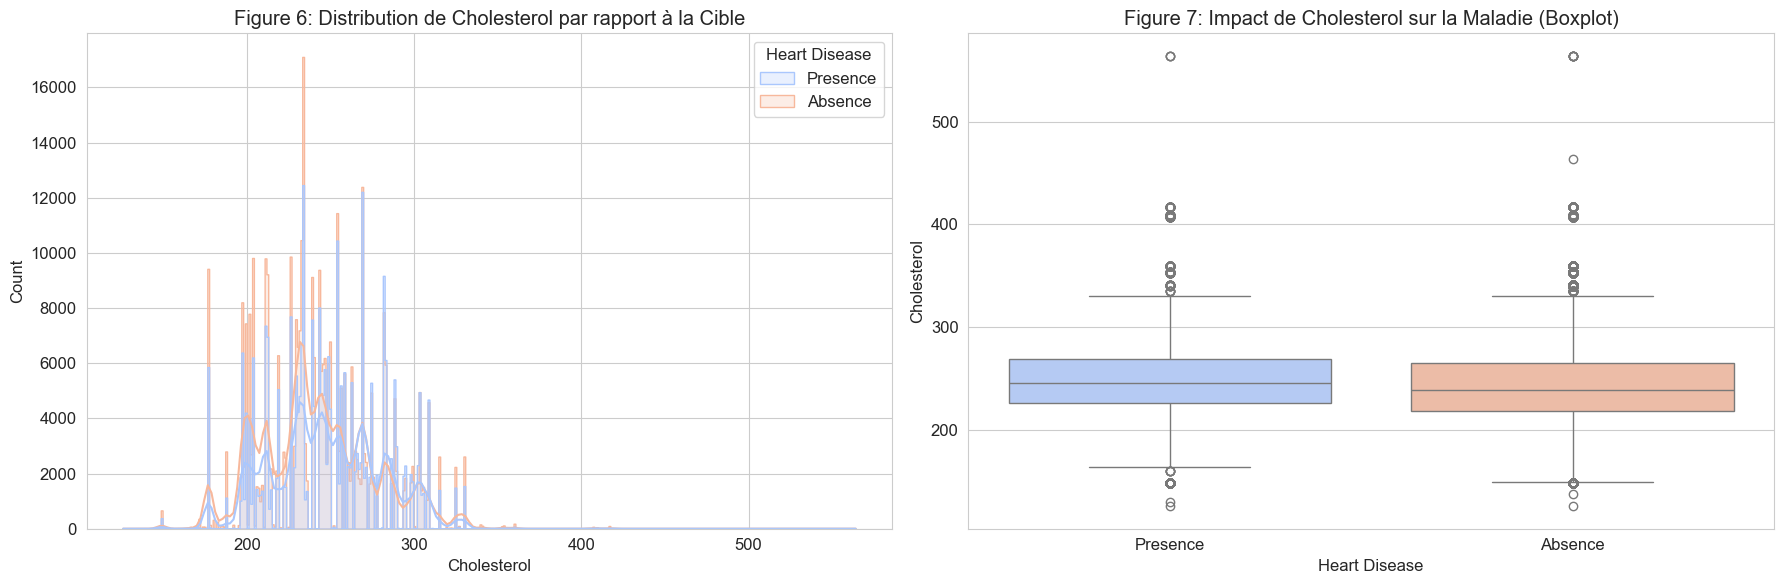

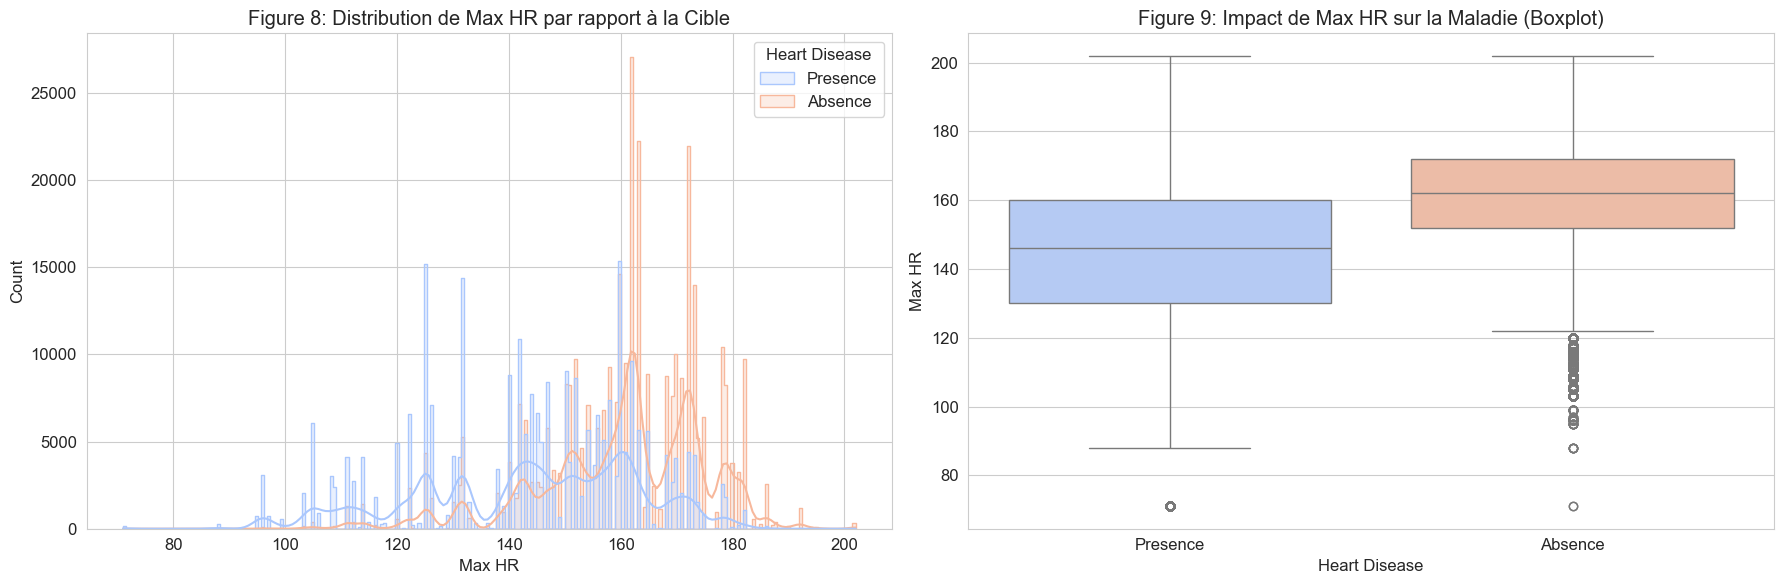

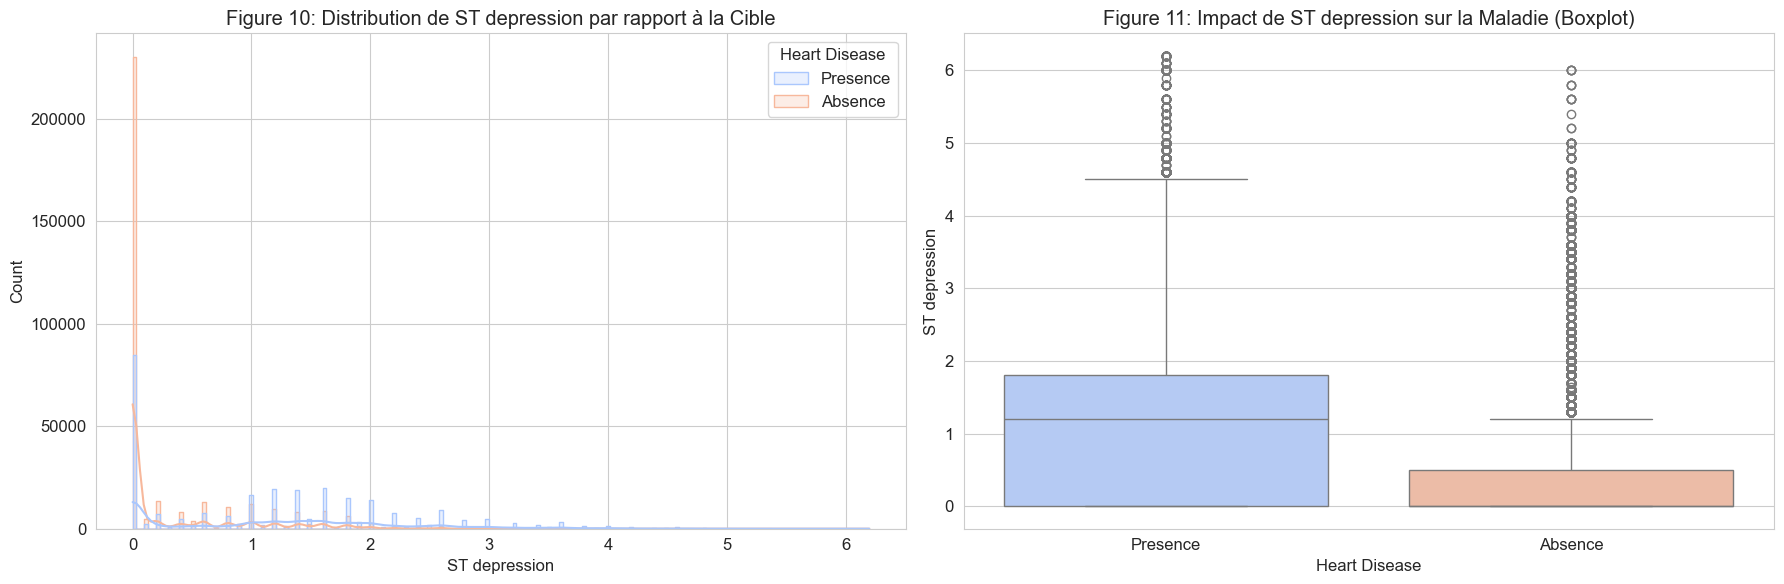

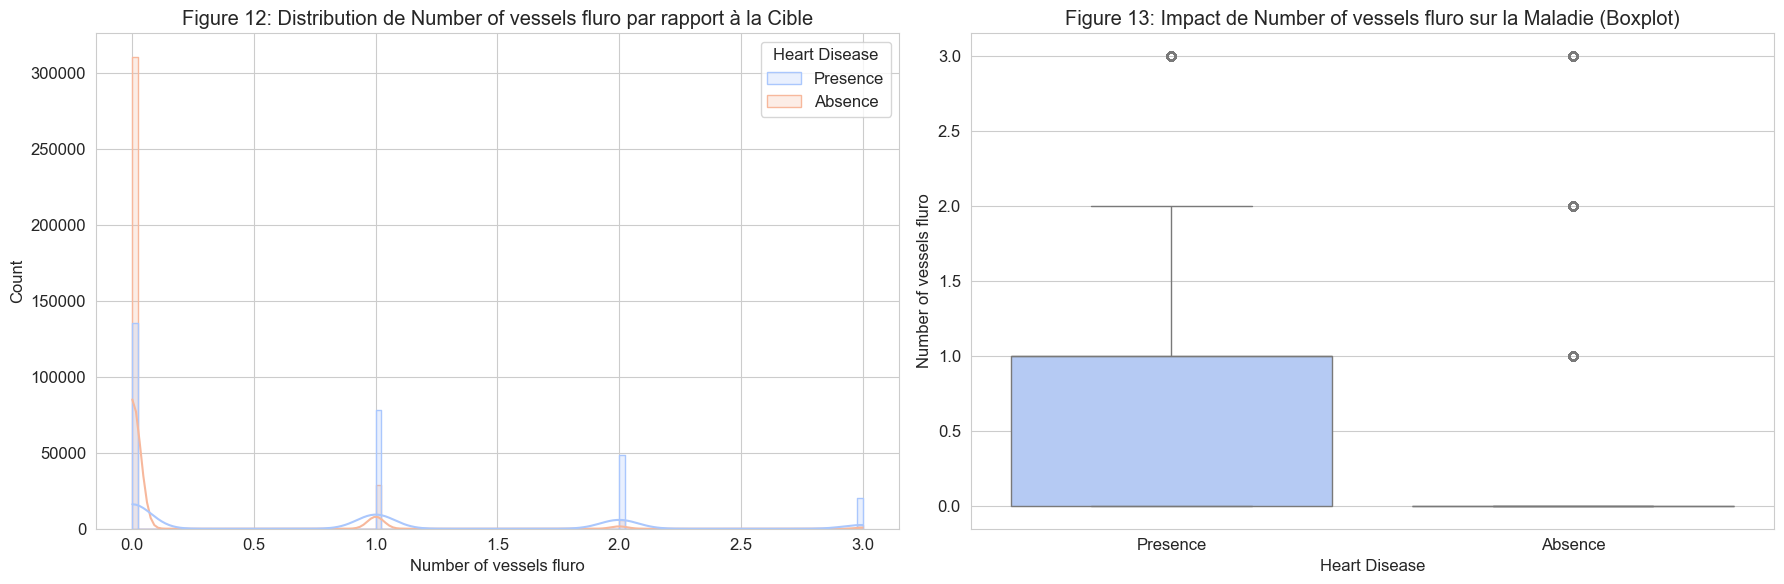

In [6]:
# Boucle automatique pour générer 2 figures par variable numérique
# Total : 6 variables * 2 graphiques = 12 Figures
fig_num = 2 

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Graphique A : Distribution (KDE + Hist)
    sns.histplot(data=df, x=col, kde=True, hue=target, element="step", ax=axes[0], palette='coolwarm')
    axes[0].set_title(f'Figure {fig_num}: Distribution de {col} par rapport à la Cible')
    
    # Graphique B : Boxplot (Détection d'Outliers et Séparation)
    sns.boxplot(data=df, x=target, y=col, palette='coolwarm', ax=axes[1])
    axes[1].set_title(f'Figure {fig_num+1}: Impact de {col} sur la Maladie (Boxplot)')
    
    plt.tight_layout()
    plt.show()
    fig_num += 2

### Groupe 3 : Analyse des Variables Catégorielles (14 Figures)
fréquence de chaque catégorie et le taux de maladie par catégorie.

Nouveaux types de données :
Heart Disease
0    347546
1    282454
Name: count, dtype: int64


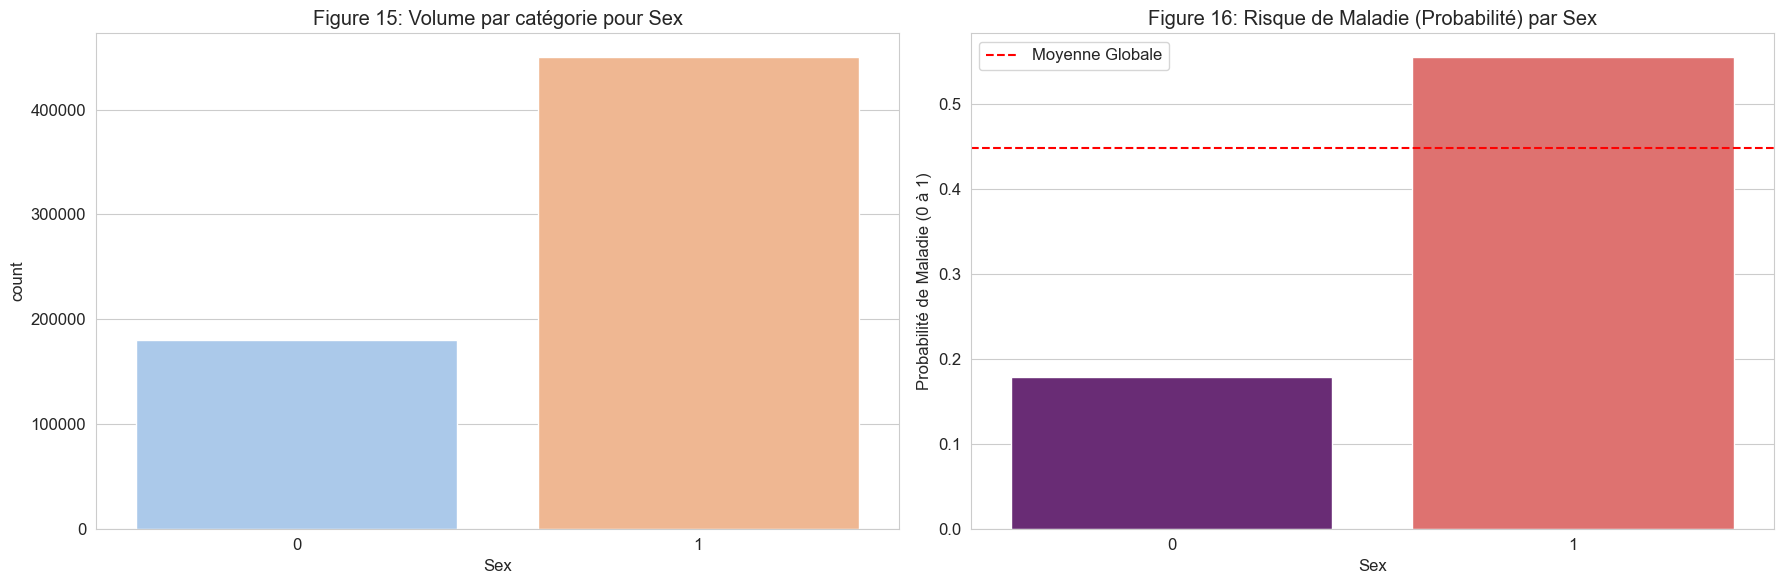

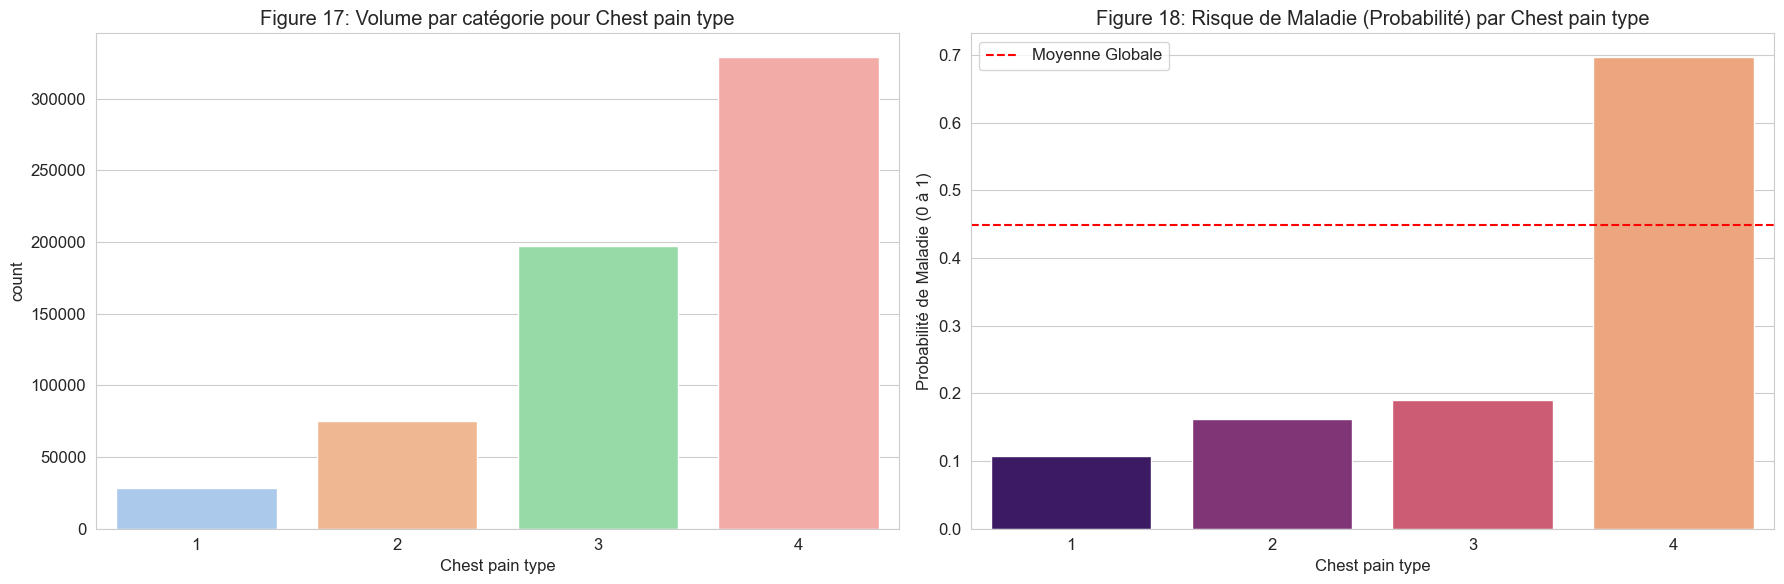

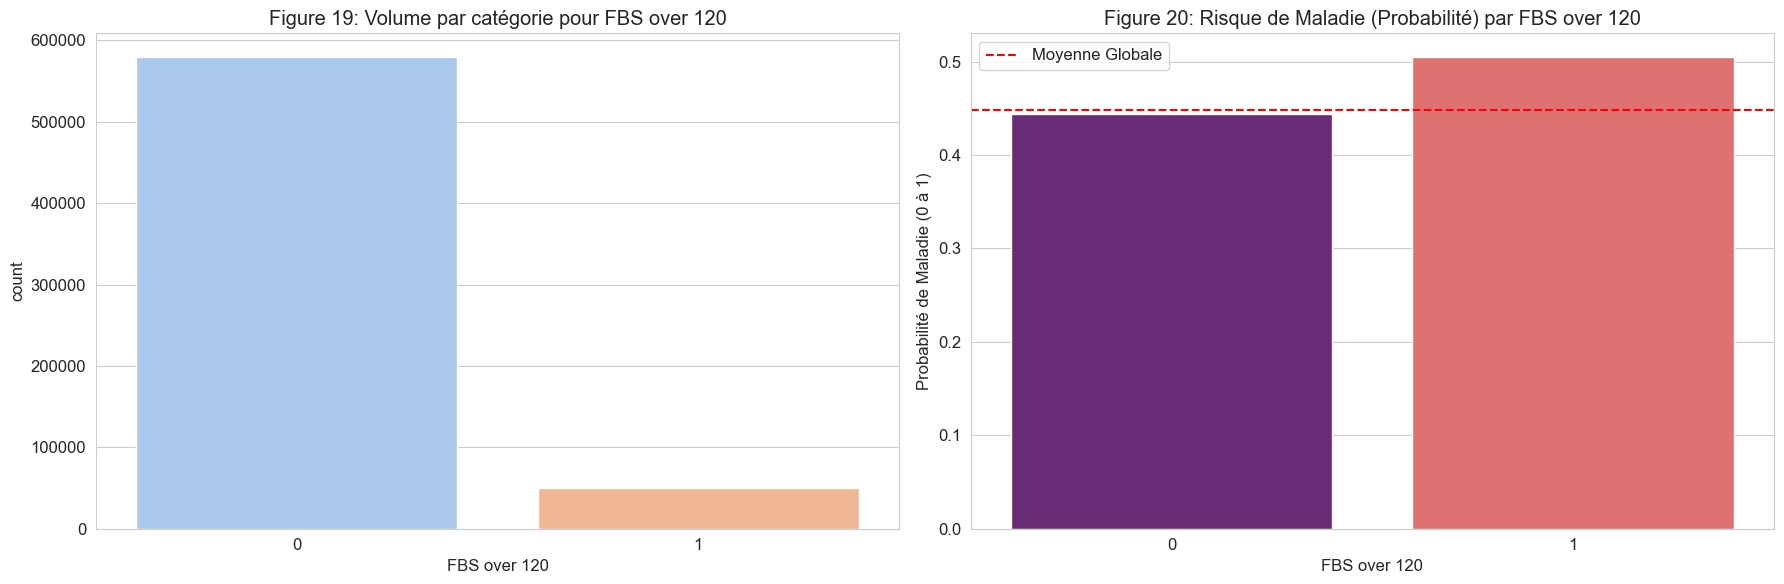

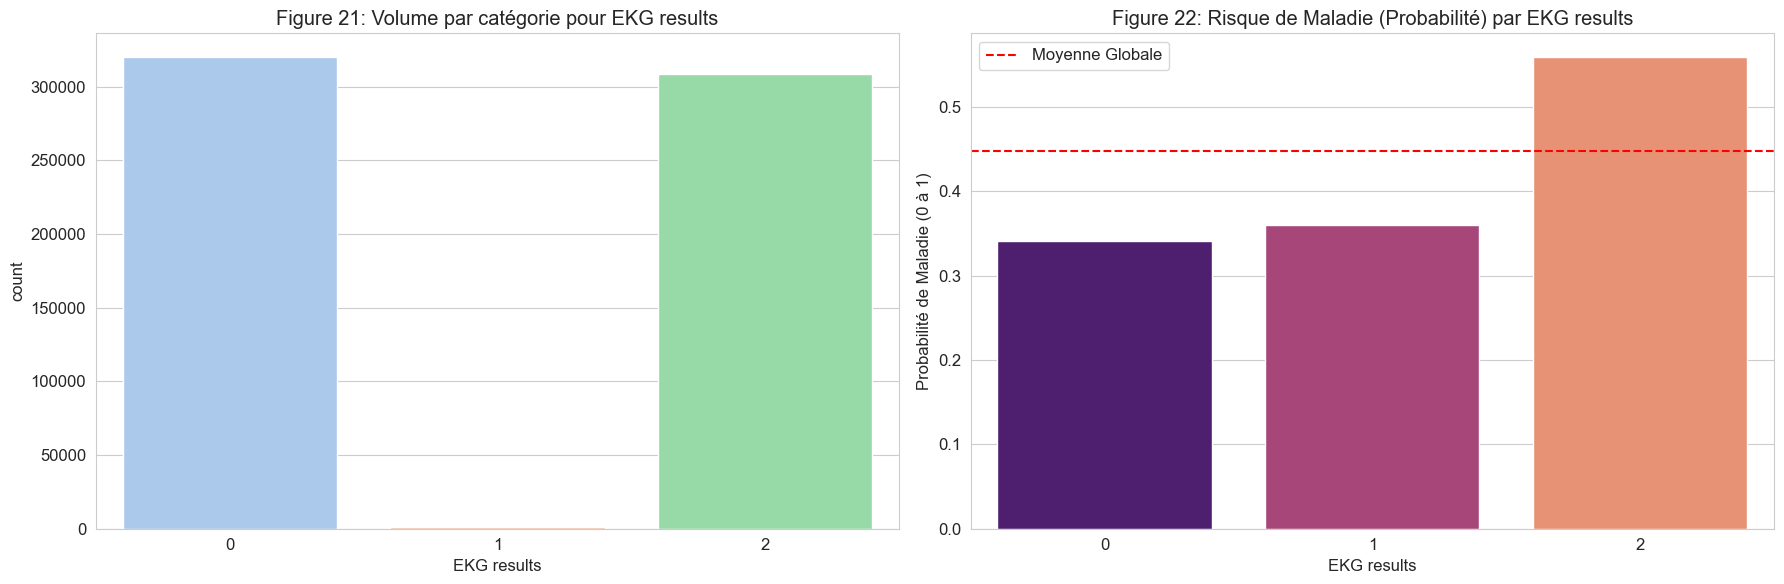

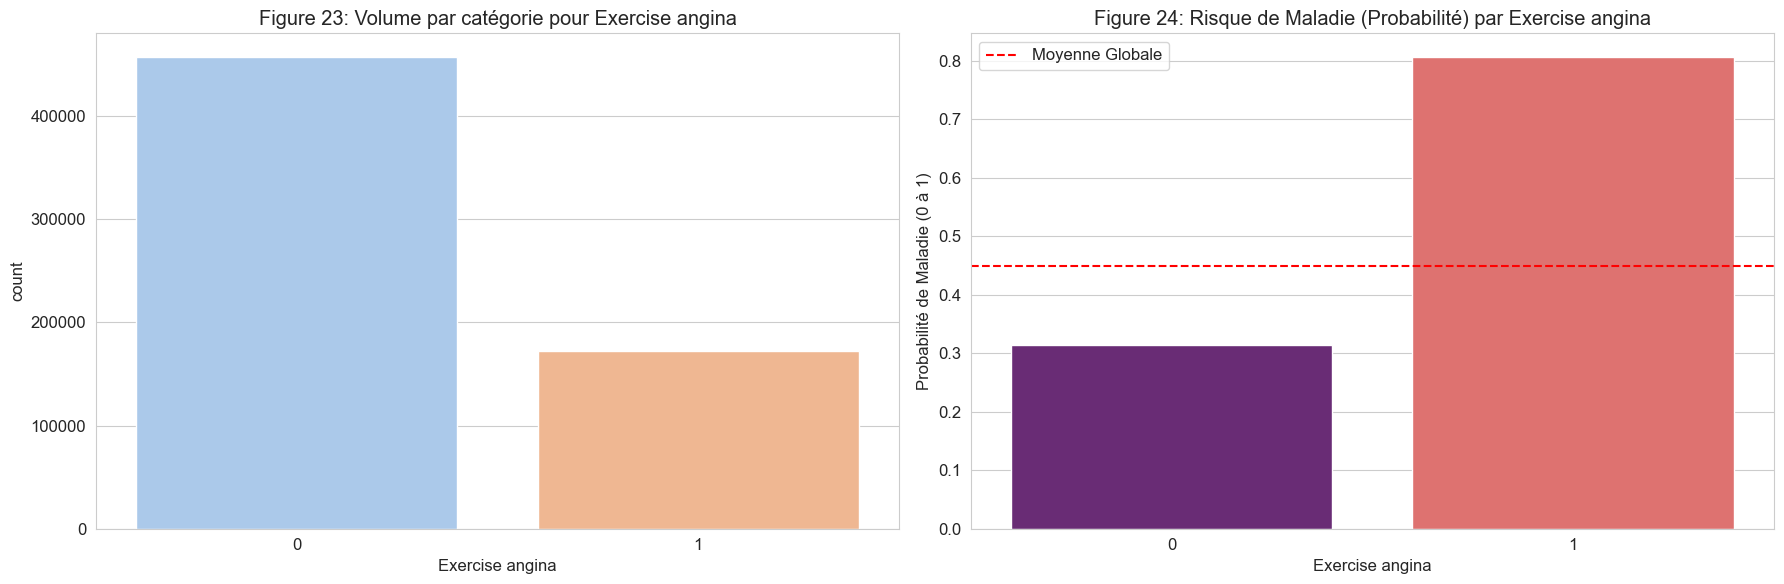

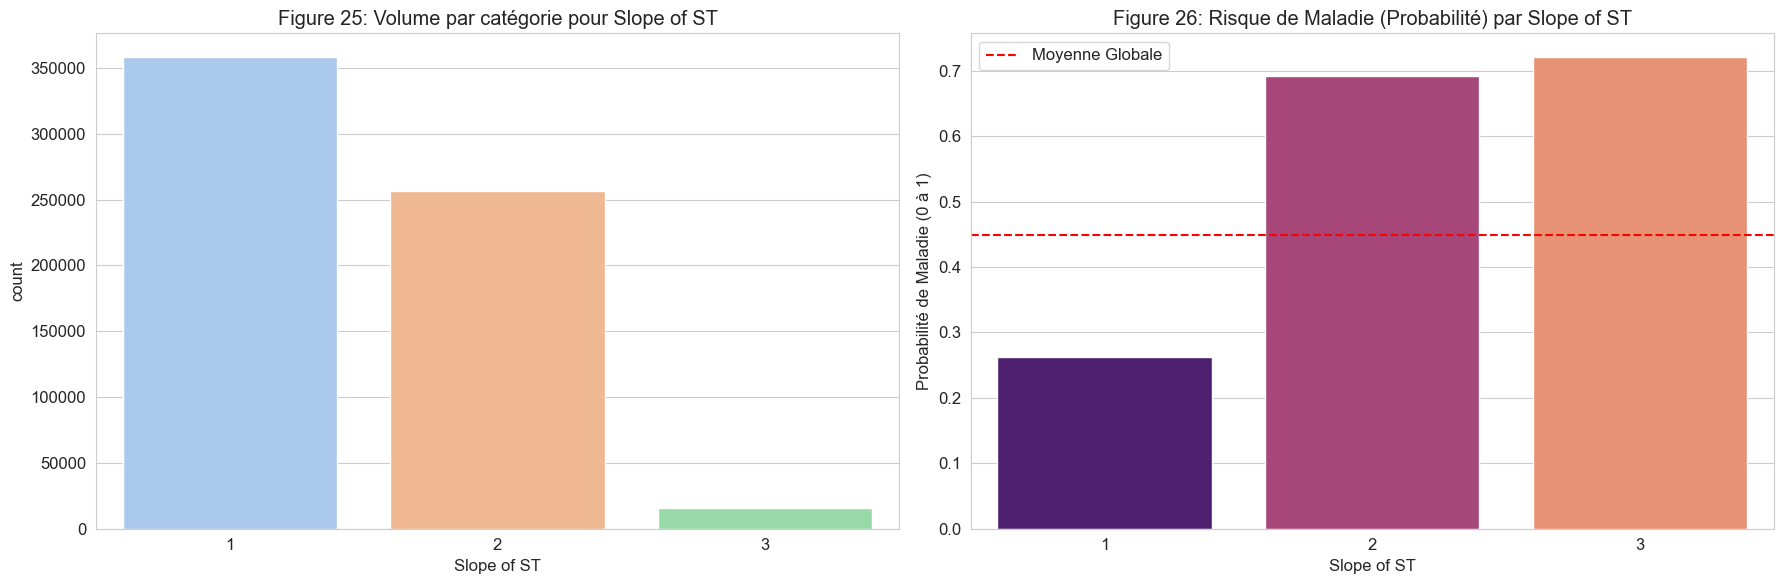

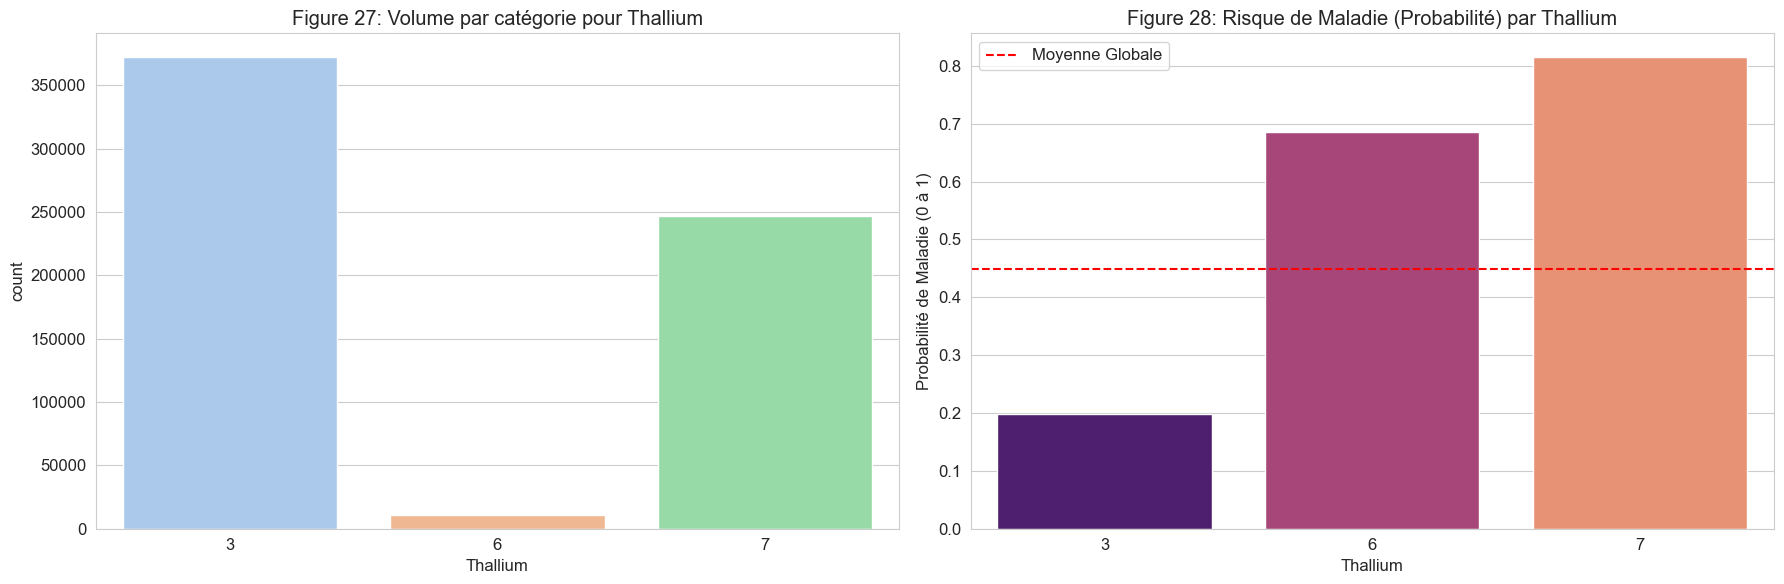

In [9]:
# Boucle automatique pour générer 2 figures par variable catégorielle
# Total : 7 variables * 2 graphiques = 14 Figures
# Conversion de la cible en numérique (0 et 1)
if df[target].dtype == 'object':
    # Si c'est du texte, on mappe les valeurs. 
    # Adapte 'Presence'/'Absence' selon ce que tu vois dans ton df.head()
    df[target] = df[target].map({'Presence': 1, 'Absence': 0, 'Yes': 1, 'No': 0, 1: 1, 0: 0})

# Vérification
print(f"Nouveaux types de données :\n{df[target].value_counts()}")


for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Graphique A : Combien de gens dans chaque catégorie ?
    sns.countplot(data=df, x=col, palette='pastel', ax=axes[0])
    axes[0].set_title(f'Figure {fig_num}: Volume par catégorie pour {col}')
    
    # Graphique B : Quel pourcentage est malade dans chaque catégorie ? (Le plus important)
    # On calcule le taux moyen de maladie par catégorie
    prop_df = df.groupby(col)[target].mean().reset_index()
    sns.barplot(data=prop_df, x=col, y=target, palette='magma', ax=axes[1])
    axes[1].set_title(f'Figure {fig_num+1}: Risque de Maladie (Probabilité) par {col}')
    axes[1].set_ylabel('Probabilité de Maladie (0 à 1)')
    axes[1].axhline(df[target].mean(), color='red', linestyle='--', label='Moyenne Globale') # Ligne de référence
    axes[1].legend()

    plt.tight_layout()
    plt.show()
    fig_num += 2

### Groupe 4 : Analyse Multivariée / Corrélations (2 Figures Clés)
Comment toutes les variables interagissent ensemble

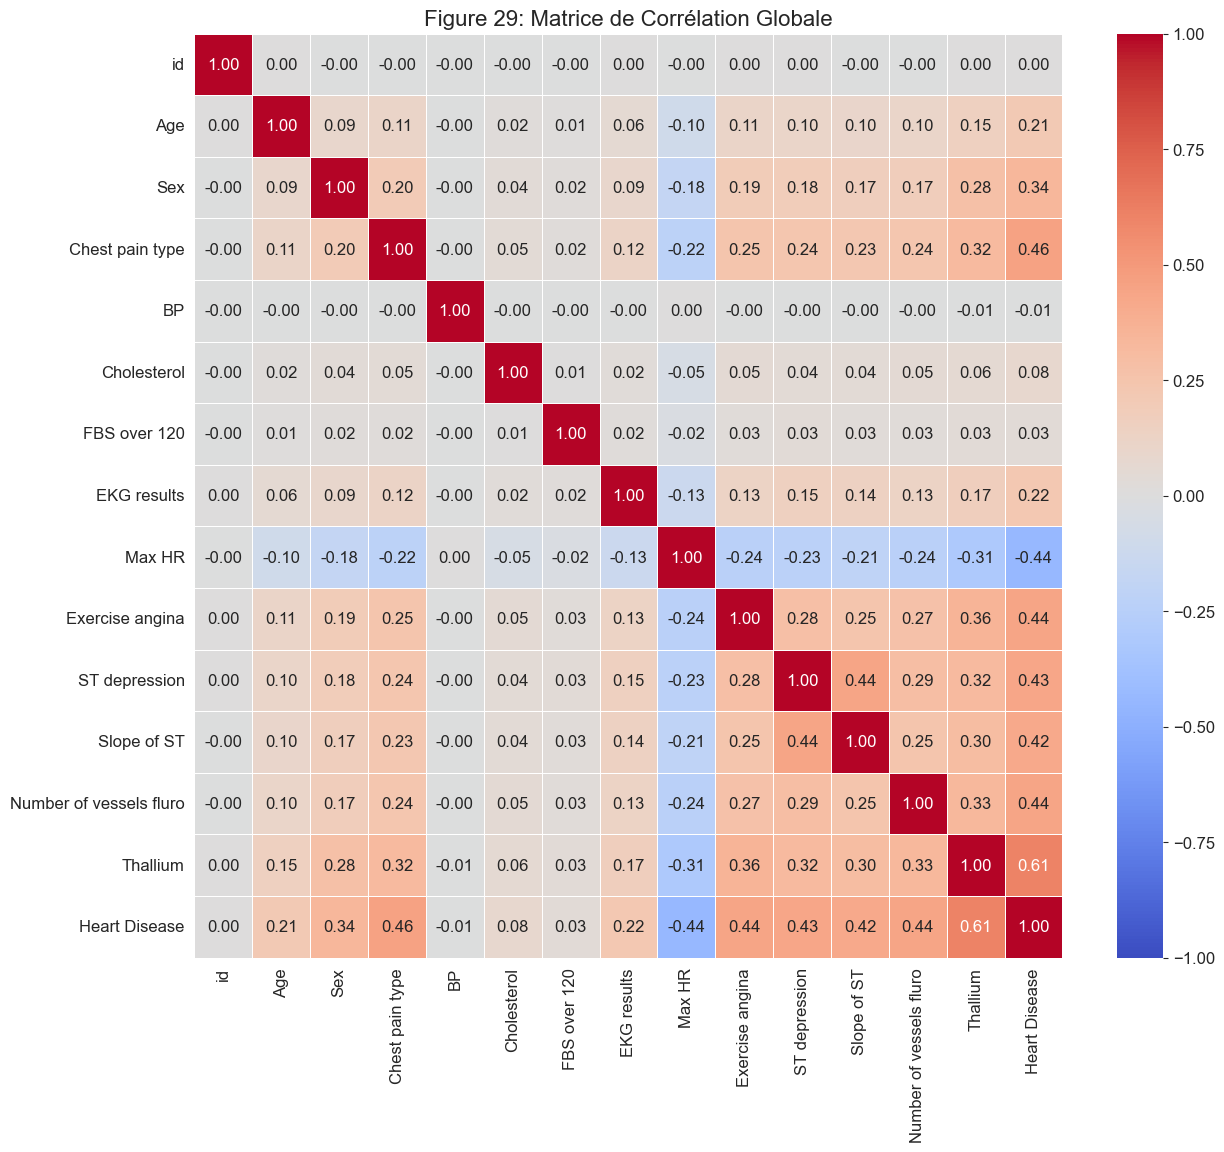

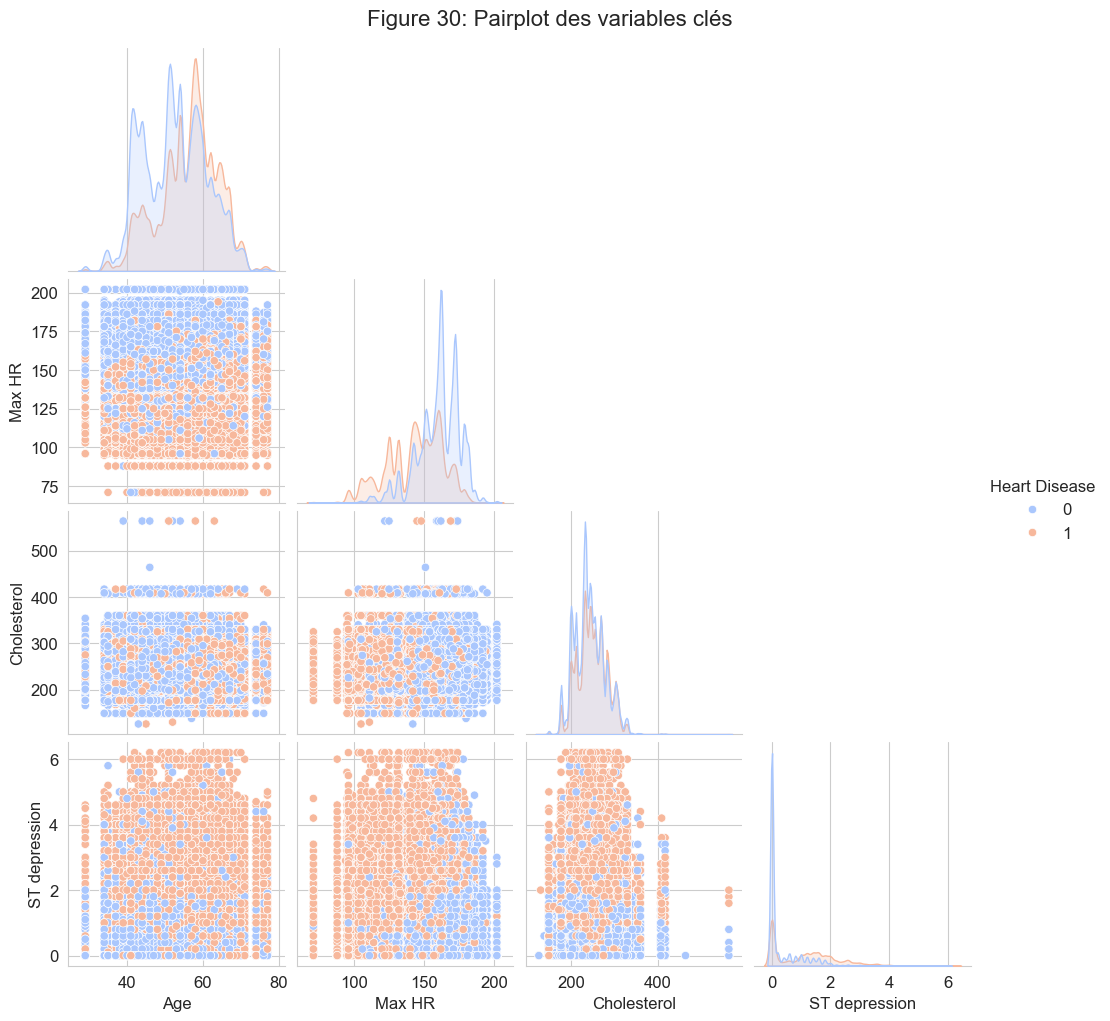

In [11]:
# Figure X : Matrice de Corrélation (Heatmap)
plt.figure(figsize=(14, 12))
# On ne garde que les colonnes numériques pour la corrélation de Pearson
corr_matrix = df.corr(numeric_only=True) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title(f'Figure {fig_num}: Matrice de Corrélation Globale', fontsize=16)
plt.show()
fig_num += 1

# Figure Y : Pairplot sur les variables clés (Le "Vue d'ensemble")
# Attention, c'est lourd à calculer, on prend un échantillon si le dataset est > 10k lignes
cols_to_plot = ['Age', 'Max HR', 'Cholesterol', 'ST depression', target] # Sélection des plus importantes
sns.pairplot(df[cols_to_plot], hue=target, palette='coolwarm', corner=True)
plt.suptitle(f'Figure {fig_num}: Pairplot des variables clés', y=1.02, fontsize=16)
plt.show()